# Assignment 5 - Helper Functions

In [122]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [117]:
#code starts here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np


fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species'], header=None)
iris = iris.dropna()
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [121]:
iris.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

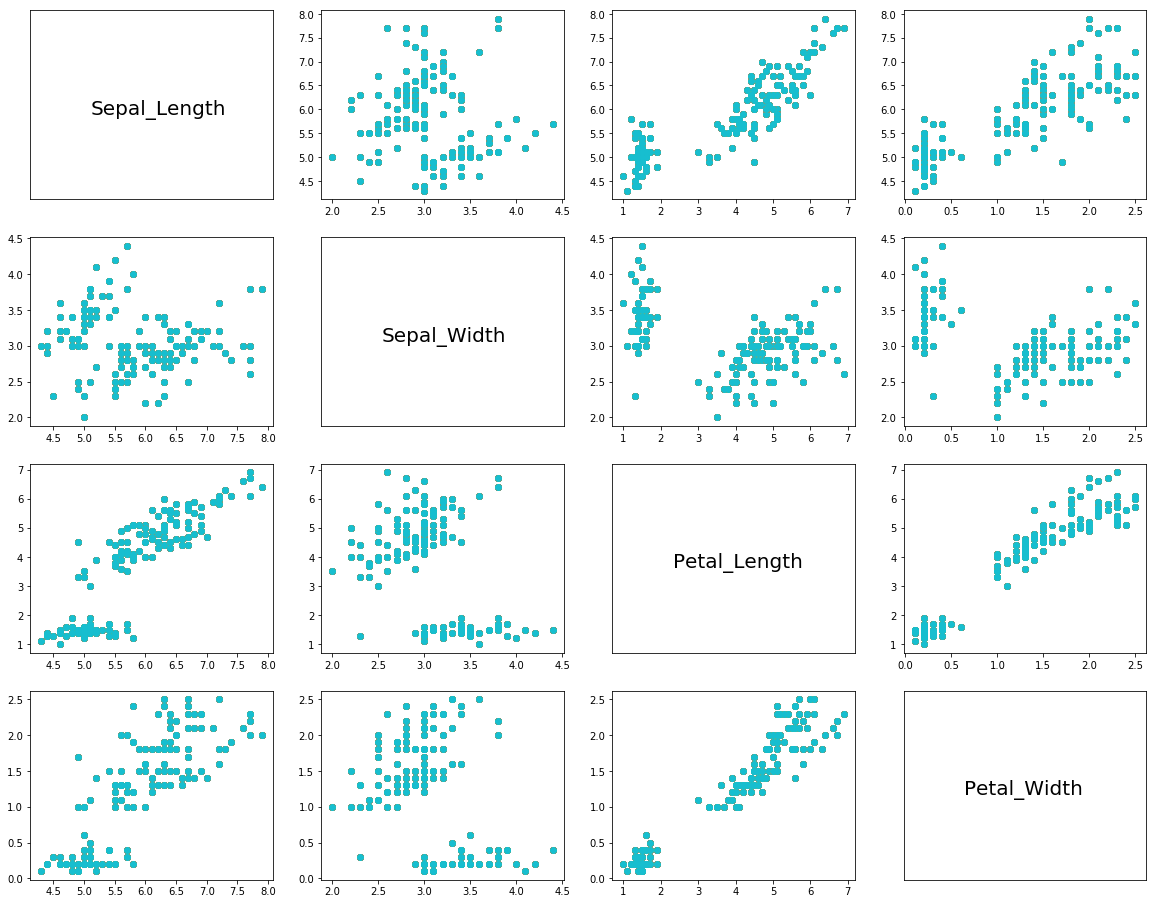

In [6]:
pairs(iris)

In [108]:
data = np.array(iris)
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data[:, [1,2,3]], data[:, 0], test_size=0.2, random_state=0)
#training model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print("Coefficients:\n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

Coefficients:
 [ 0.66946332  0.7239739  -0.58294452]
Mean squared error: 0.11
Variance score: 0.79


In [109]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data[:, [0,2,3]], data[:, 1], test_size=0.2, random_state=0)
#training model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print("Coefficients:\n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

Coefficients:
 [ 0.63314797 -0.59748431  0.57436319]
Mean squared error: 0.09
Variance score: 0.53


In [110]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data[:, [0,1,3]], data[:, 2], test_size=0.2, random_state=0)
#training model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print("Coefficients:\n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

Coefficients:
 [ 0.70104163 -0.61174295  1.47879199]
Mean squared error: 0.13
Variance score: 0.95


In [111]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data[:, [0,1,2]], data[:, 3], test_size=0.2, random_state=0)
#training model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print("Coefficients:\n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

Coefficients:
 [-0.19987362  0.20822671  0.52361786]
Mean squared error: 0.05
Variance score: 0.89


#### Observation from above models
Based on the statistics of all the above multiple regression models, 
Model with features X ='Sepal_Length', 'Sepal_Width', 'Petal_Length' and Y =  'Petal_Width'
perform better giving least Mean squared error as 0.05.

In [123]:
# Visualize the plot of the linear regression models generated on each pairwise combination of features along 
# with corresponding model statistics
def pairs_reg(data):
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                
                ## run model on training set with one feature as independent and other as dependent variable
                X_train, X_test, y_train, y_test = train_test_split(data[col2], data[col1], test_size=0.2, random_state=0)
                X_train = X_train.values.reshape(-1, 1)
                y_train = y_train.values.reshape(-1, 1)
                X_test = X_test.values.reshape(-1, 1)
                y_test = y_test.values.reshape(-1, 1)
                reg = linear_model.LinearRegression()
                reg.fit(X_train, y_train)
                y_pred = reg.predict(X_test)
                    
                print("Model %d: " %i + "X = %s, " %col2 + "Y = %s" %col1)
                # The coefficients
                print("Coefficients: ", reg.coef_)
                # The mean squared error
                print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))
                # Explained variance score: 1 is perfect prediction
                print('Variance score: %.2f' % reg.score(X_test, y_test))
                print('\n')                    
                ax.plot(X_test, y_pred, color='blue', linewidth=3)
                                                           
            i += 1

    pl.show()

Model 2: X = Sepal_Width, Y = Sepal_Length
Coefficients:  [[-0.11925641]]
Mean squared error: 0.52
Variance score: -0.02


Model 3: X = Petal_Length, Y = Sepal_Length
Coefficients:  [[0.41727277]]
Mean squared error: 0.15
Variance score: 0.70


Model 4: X = Petal_Width, Y = Sepal_Length
Coefficients:  [[0.90697631]]
Mean squared error: 0.23
Variance score: 0.55


Model 5: X = Sepal_Length, Y = Sepal_Width
Coefficients:  [[-0.03075937]]
Mean squared error: 0.19
Variance score: 0.03


Model 7: X = Petal_Length, Y = Sepal_Width
Coefficients:  [[-0.09137302]]
Mean squared error: 0.14
Variance score: 0.30


Model 8: X = Petal_Width, Y = Sepal_Width
Coefficients:  [[-0.1809932]]
Mean squared error: 0.15
Variance score: 0.20


Model 9: X = Sepal_Length, Y = Petal_Length
Coefficients:  [[1.83808438]]
Mean squared error: 0.77
Variance score: 0.72


Model 10: X = Sepal_Width, Y = Petal_Length
Coefficients:  [[-1.56051414]]
Mean squared error: 1.93
Variance score: 0.30


Model 12: X = Petal_Width

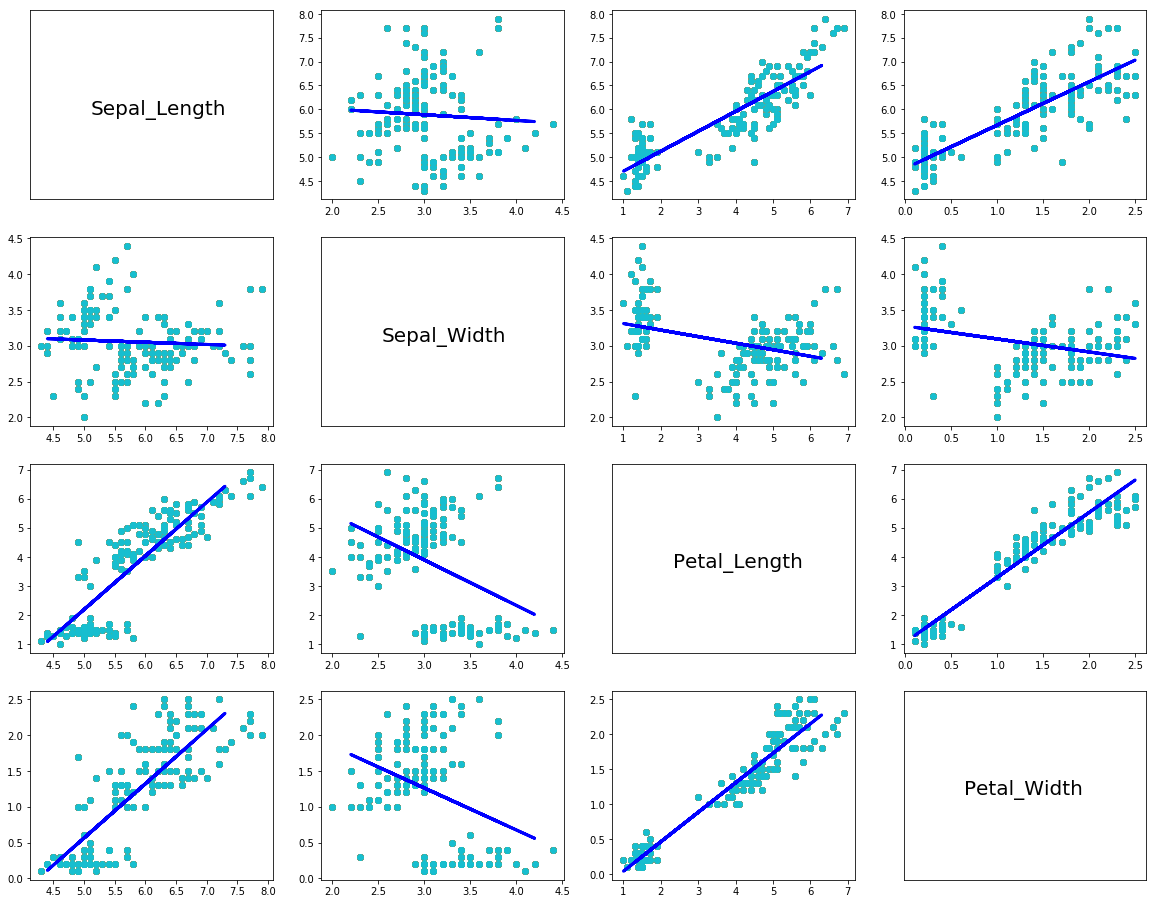

In [124]:
pairs_reg(iris)

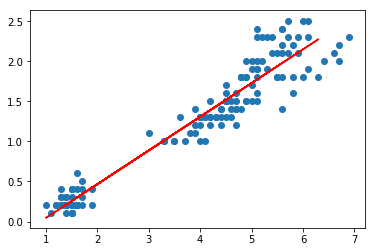

Coefficients:
 [[0.42118973]]
Mean squared error: 0.06
Variance score: 0.87


In [126]:
## plot of the best overall linear regression model (Model 15)
X_train, X_test, y_train, y_test = train_test_split(data[:, 2], data[:, 3], test_size=0.2, random_state=0)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

pl.scatter(data[:, 2], data[:, 3])
pl.plot(X_test, y_pred, color='red')
pl.show()

print("Coefficients:\n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

### Question 1:

Based upon the linear models generated, model with X = Petal_Length, Y = Petal_Width
gives least mean square error 0.06, thus this model perform better compare to other models

Here "Petal_Length" is the predictor (independent) variable and "Petal_Width" is the dependent variable.

So, the feature "Petal_Length" appears most predictive for "Petal_Width"

### Question 2:

The removal of feature "Petal_Width" would not affect the classification performance because the feature "Petal_Width" could be predicted from feature "Petal_Length". So, including "Petal_Width" does not provide any additional information to the model.

Therefore, removing feature "Petal_Width" would not affect the classification performance.